# Estatística para Machine Learning

## 7. Intervalos de confiança e testes de hipóteses

In [1]:
import numpy as np
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import math

In [2]:
dados = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

In [3]:
n = len(dados)
n

100

In [4]:
media = np.mean(dados)
media

159.25

In [5]:
desvio_padrao = np.std(dados)
desvio_padrao

13.65

### Cálculo do intervalo de confiança - manual

In [6]:
alpha = 0.05 / 2
alpha

0.025

In [7]:
1 - alpha

0.975

In [8]:
z = norm.ppf(1 - alpha)
z

1.959963984540054

In [9]:
x_inferior = media - z * (desvio_padrao / math.sqrt(n))
x_inferior

156.57464916110283

In [10]:
x_superior = media + z * (desvio_padrao / math.sqrt(n))
x_superior

161.92535083889717

In [11]:
margem_erro = abs(media - x_superior)
margem_erro

2.675350838897174

C:\Users\Libania\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


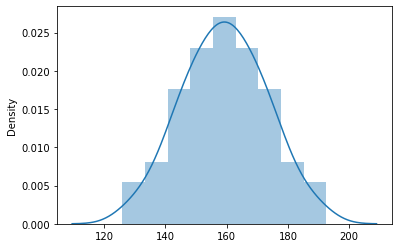

In [12]:
sns.distplot(dados);

### Cálculo do intervalo de confiança - scipy

In [13]:
stats.sem(dados)

1.3718766178288244

In [14]:
desvio_padrao / math.sqrt(n-1)

1.3718766178288246

In [15]:
intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos

(156.5611712378229, 161.9388287621771)

In [16]:
margem_erro = media - intervalos[0]
margem_erro

2.68882876217711

### Diferentes níveis de confiança

In [17]:
intervalos = norm.interval(0.99, media, stats.sem(dados))
intervalos

(155.71628000694295, 162.78371999305705)

In [18]:
margem_erro = media - intervalos[0]
margem_erro

3.5337199930570478

In [19]:
intervalos = norm.interval(0.8, media, stats.sem(dados))
intervalos

(157.49186937268743, 161.00813062731257)

In [20]:
margem_erro = media - intervalos[0]
margem_erro

1.7581306273125676

### Exercício

In [21]:
dados_salario = np.array([82.1191, 72.8014, 79.1266, 71.3552, 59.192 , 79.1952, 56.518 ,
                          70.3752, 73.5364, 61.0407, 64.3902, 66.4076, 63.5215, 71.9936,
                          60.1489, 78.5932, 76.0459, 67.7726, 64.6149, 80.1948, 76.7998,
                          76.1831, 80.7065, 62.4953, 57.204 , 62.5408, 80.0982, 63.287 ,
                          66.5826, 79.3674])

In [22]:
media = dados_salario.mean()
media

70.14025666666666

In [23]:
desvio_padrao = np.std(dados_salario)
desvio_padrao

7.899834598255137

In [26]:
intervalos = norm.interval(0.95, media, stats.sem(dados_salario))
intervalos

(67.26506308375339, 73.01545024957993)

In [27]:
# Temos 95% de confiança de que a média salarial das pessoas está
# no intervalo entre 67.26 e 73.01

### Distribuição T Student

In [28]:
dados = np.array([149. , 160., 147., 189., 175., 168., 156., 160., 152.])

In [29]:
n = len(dados)
n

9

In [30]:
media = dados.mean()
media

161.77777777777777

In [31]:
desvio_padrao = np.std(dados)
desvio_padrao

12.786953227391823

In [32]:
from scipy.stats import t

In [33]:
intervalos = t.interval(0.95, n-1, media, stats.sem(dados, ddof=0))
intervalos

(151.9488554388298, 171.60670011672573)

In [34]:
margem_erro = media - intervalos[0]
margem_erro

9.828922338947962

### Intervalos de confiança e classificação

#### Accuracy

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
dataset = pd.read_csv('credit_data.csv')
dataset.dropna(inplace=True)
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [36]:
X = dataset.iloc[:, 1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [37]:
y = dataset.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [38]:
resultados_naive_bayes_cv = []
resultados_naive_bayes_cv_300 = []
resultados_logistica_cv = []
resultados_logistica_cv_300 = []
resultados_forest_cv = []
resultados_forest_cv_300 = []
for i in range(30):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
  
  naive_bayes = GaussianNB()
  scores = cross_val_score(naive_bayes, X, y, cv = kfold)
  resultados_naive_bayes_cv_300.append(scores)
  resultados_naive_bayes_cv.append(scores.mean())

  logistica = LogisticRegression()
  scores = cross_val_score(logistica, X, y, cv = kfold)
  resultados_logistica_cv_300.append(scores)
  resultados_logistica_cv.append(scores.mean())
  
  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, X, y, cv = kfold)
  resultados_forest_cv_300.append(scores)
  resultados_forest_cv.append(scores.mean())

In [39]:
len(resultados_naive_bayes_cv), len(resultados_naive_bayes_cv_300)

(30, 30)

In [40]:
print(resultados_naive_bayes_cv)

[0.9248618090452261, 0.9249170854271356, 0.9248894472361808, 0.9228819095477387, 0.9248718592964824, 0.9253894472361809, 0.9243844221105528, 0.9248894472361808, 0.9248718592964824, 0.9238894472361808, 0.9253844221105527, 0.9244020100502512, 0.9253743718592965, 0.924394472361809, 0.9253869346733667, 0.9248819095477387, 0.9258844221105527, 0.924894472361809, 0.9238819095477387, 0.9258844221105529, 0.9258944723618091, 0.9253894472361811, 0.92436432160804, 0.9263844221105527, 0.9228944723618092, 0.9253894472361809, 0.9248869346733668, 0.9253919597989949, 0.9253819095477386, 0.9258844221105527]


In [41]:
print(resultados_naive_bayes_cv_300)

[array([0.91      , 0.93      , 0.96      , 0.925     , 0.94      ,
       0.895     , 0.965     , 0.89949749, 0.87939698, 0.94472362]), array([0.92      , 0.945     , 0.895     , 0.92      , 0.915     ,
       0.93      , 0.89      , 0.94974874, 0.93467337, 0.94974874]), array([0.93      , 0.89      , 0.94      , 0.935     , 0.905     ,
       0.935     , 0.935     , 0.91959799, 0.94472362, 0.91457286]), array([0.91      , 0.945     , 0.95      , 0.94      , 0.92      ,
       0.9       , 0.9       , 0.90954774, 0.91959799, 0.93467337]), array([0.96      , 0.93      , 0.94      , 0.905     , 0.935     ,
       0.93      , 0.905     , 0.90452261, 0.89949749, 0.93969849]), array([0.915     , 0.91      , 0.945     , 0.945     , 0.9       ,
       0.935     , 0.925     , 0.96482412, 0.89949749, 0.91457286]), array([0.955     , 0.935     , 0.915     , 0.94      , 0.905     ,
       0.9       , 0.925     , 0.92462312, 0.92462312, 0.91959799]), array([0.94      , 0.92      , 0.925     , 0.91

In [42]:
np.asarray(resultados_naive_bayes_cv_300).shape

(30, 10)

In [43]:
resultados_naive_bayes_cv = np.array(resultados_naive_bayes_cv)
resultados_naive_bayes_cv_300 = np.array(np.asarray(resultados_naive_bayes_cv_300).reshape(-1))
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_logistica_cv_300 = np.array(np.asarray(resultados_logistica_cv_300).reshape(-1))
resultados_forest_cv = np.array(resultados_forest_cv)
resultados_forest_cv_300 = np.array(np.asarray(resultados_forest_cv_300).reshape(-1))

In [44]:
resultados_naive_bayes_cv_300.shape

(300,)

C:\Users\Libania\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


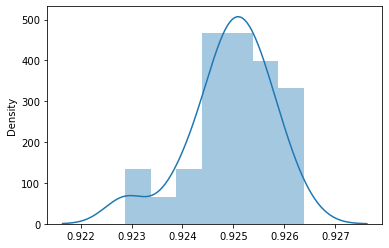

In [45]:
sns.distplot(resultados_naive_bayes_cv);

C:\Users\Libania\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


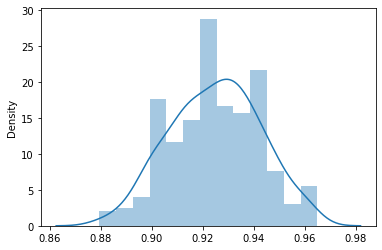

In [48]:
sns.distplot(resultados_naive_bayes_cv_300);

C:\Users\Libania\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


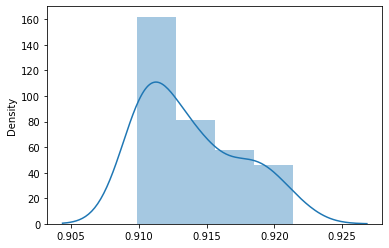

In [47]:
sns.distplot(resultados_logistica_cv);

C:\Users\Libania\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


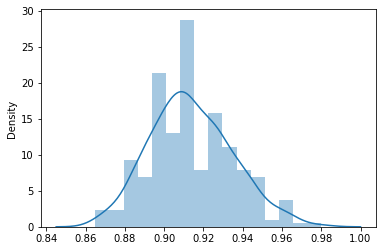

In [49]:
sns.distplot(resultados_logistica_cv_300);

C:\Users\Libania\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


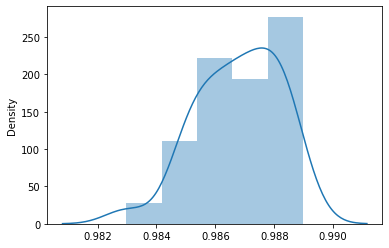

In [50]:
sns.distplot(resultados_forest_cv);

C:\Users\Libania\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


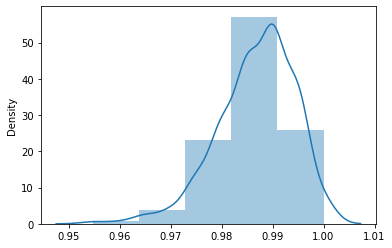

In [51]:
sns.distplot(resultados_forest_cv_300, bins=5);

In [52]:
resultados_naive_bayes_cv.mean(), resultados_logistica_cv.mean(), resultados_forest_cv.mean()

(0.9249359296482411, 0.9137817420435511, 0.9867803182579564)

In [53]:
stats.variation(resultados_naive_bayes_cv) * 100, stats.variation(resultados_logistica_cv) * 100, stats.variation(resultados_forest_cv) * 100

(0.08641071566366061, 0.38801026116292653, 0.14156428873760699)

In [54]:
from scipy.stats import t
from scipy.stats import norm

In [55]:
# Naïve bayes
intervalos_naive_bayes_t = t.interval(0.95, len(resultados_naive_bayes_cv) - 1, 
                                    resultados_naive_bayes_cv.mean(), 
                                    stats.sem(resultados_naive_bayes_cv, ddof = 0))
intervalos_naive_bayes_t

(0.9246374871248957, 0.9252343721715865)

In [56]:
abs(resultados_naive_bayes_cv.mean() - intervalos_naive_bayes_t[1])

0.0002984425233454324

In [57]:
intervalos_naive_bayes_n = norm.interval(0.95, resultados_naive_bayes_cv_300.mean(), 
                                         stats.sem(resultados_naive_bayes_cv_300))
intervalos_naive_bayes_n

(0.9229333893644709, 0.9269384699320113)

In [58]:
abs(resultados_naive_bayes_cv_300.mean() - intervalos_naive_bayes_n[1])

0.0020025402837702266

In [59]:
# Regressão Logística
intervalos_logistica_t = t.interval(0.95, len(resultados_logistica_cv) - 1, 
                                    resultados_logistica_cv.mean(), 
                                    stats.sem(resultados_logistica_cv, ddof = 0))
intervalos_logistica_t

(0.9124578055959317, 0.9151056784911705)

In [60]:
abs(resultados_logistica_cv.mean() - intervalos_logistica_t[1])

0.0013239364476194115

In [61]:
intervalos_logistica_n = norm.interval(0.95, resultados_logistica_cv_300.mean(), 
                                       stats.sem(resultados_logistica_cv_300))
intervalos_logistica_n

(0.9114192660020396, 0.9161442180850629)

In [62]:
abs(resultados_logistica_cv_300.mean() - intervalos_logistica_n[1])

0.0023624760415116297

In [63]:
# Random Forest
intervalos_forest_t = t.interval(0.95, len(resultados_forest_cv) - 1, 
                                 resultados_forest_cv.mean(), 
                                 stats.sem(resultados_forest_cv, ddof = 0))
intervalos_forest_t

(0.986258696568902, 0.9873019399470109)

In [64]:
abs(resultados_forest_cv.mean() - intervalos_forest_t[1])

0.0005216216890544523

In [65]:
intervalos_forest_n = norm.interval(0.95, resultados_forest_cv_300.mean(), 
                                    stats.sem(resultados_forest_cv_300))
intervalos_forest_n

(0.985923665566987, 0.9876369709489259)

In [66]:
abs(resultados_forest_cv_300.mean() - intervalos_forest_n[1])

0.0008566526909694616

In [67]:
# Temos 95% de confiança de que a média de acertos do Random Forest está
# no intervalo entre 98,63% e 98,74% - 98,59% e 98,77%

In [68]:
kfold = KFold(n_splits = 10, shuffle = True)
random_forest = RandomForestClassifier()
scores = cross_val_score(random_forest, X, y, cv = kfold)
print(scores.mean())

0.9889748743718594
